In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
img_height,img_width = 128,128
batch_size = 14
train_data = tf.keras.utils.image_dataset_from_directory('classification/train_data',
                                                         image_size = (img_height,img_width),
                                                         batch_size = batch_size)

Found 6300 files belonging to 7 classes.


In [3]:
img_height,img_width =  128,128
batch_size = 14
test_data = tf.keras.utils.image_dataset_from_directory('classification/test_data',
                                                         image_size = (img_height,img_width),
                                                        )

Found 700 files belonging to 7 classes.


In [4]:
img_height,img_width = 128,128
batch_size = 14
validation_data = tf.keras.utils.image_dataset_from_directory('classification/validation_data',
                                                         image_size = (img_height,img_width),
                                                         batch_size = batch_size)

Found 1400 files belonging to 7 classes.


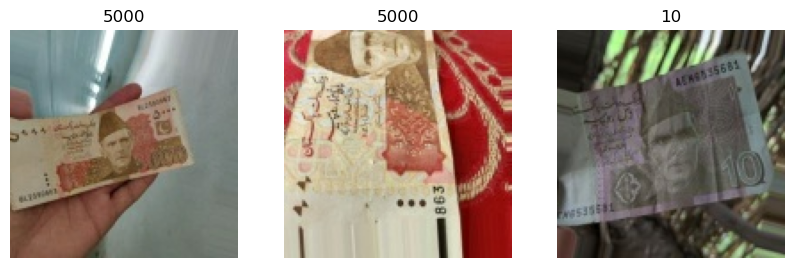

In [5]:
class_name =['10','100','1000','20','50','500','5000']
plt.figure(figsize = (10,10))
for images, labels in train_data:
    for i in range(3):
        ax = plt.subplot(1,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_name[labels[i]])  
        plt.axis('off')
        

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1.0/255.0),
    tf.keras.layers.Conv2D(32,3, activation = 'relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32,3, activation = 'relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64,3, activation = 'relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64,activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32,activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(7,activation = 'softmax')
    
])

In [7]:
model.compile(
    optimizer = 'adam',
    loss = tf.losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy']
)

In [8]:
model.fit(
train_data,
    validation_data = validation_data,
    epochs = 10
)

Epoch 1/10
450/450 [==============================] - 97s 213ms/step - loss: 1.4025 - accuracy: 0.4141 - val_loss: 0.6537 - val_accuracy: 0.7843
Epoch 2/10
450/450 [==============================] - 98s 219ms/step - loss: 0.7655 - accuracy: 0.7248 - val_loss: 0.4309 - val_accuracy: 0.8829
Epoch 3/10
450/450 [==============================] - 109s 242ms/step - loss: 0.5469 - accuracy: 0.8149 - val_loss: 0.2869 - val_accuracy: 0.9121
Epoch 4/10
450/450 [==============================] - 105s 232ms/step - loss: 0.4116 - accuracy: 0.8638 - val_loss: 0.1942 - val_accuracy: 0.9436
Epoch 5/10
450/450 [==============================] - 98s 218ms/step - loss: 0.3321 - accuracy: 0.8941 - val_loss: 0.1051 - val_accuracy: 0.9700
Epoch 6/10
450/450 [==============================] - 101s 225ms/step - loss: 0.2458 - accuracy: 0.9222 - val_loss: 0.1192 - val_accuracy: 0.9650
Epoch 7/10
450/450 [==============================] - 107s 238ms/step - loss: 0.2062 - accuracy: 0.9300 - val_loss: 0.0957 - va

In [9]:
model.evaluate(test_data)

22/22 [==============================] - 3s 121ms/step - loss: 0.1845 - accuracy: 0.9286


[0.18451601266860962, 0.9285714030265808]

1/1 [==============================] - 0s 266ms/step


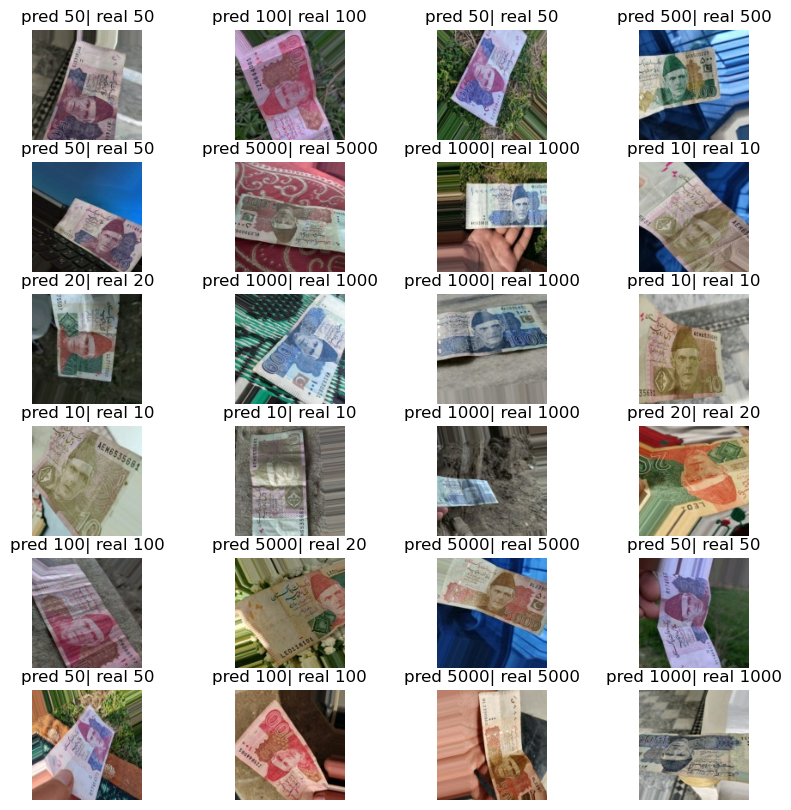

In [10]:
plt.figure(figsize=(10,10))
for images, labels in test_data.take(1):
    classification = model.predict(images)
#     print(classification)
    for i in range(24):
        ax = plt.subplot(6,4,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        index = np.argmax(classification[i])
        plt.title('pred ' + class_name[index] + '| real ' + class_name[labels[i]])
        plt.axis('off')

In [11]:
# converter = tf.lite.TFLiteConverter.from_keras_model(model)
# tflite_convert = converter.convert()
# with open('model_128.tflite','wb') as f:
#     f.write(tflite_convert)


INFO:tensorflow:Assets written to: C:\Users\ihsan\AppData\Local\Temp\tmpwbqfhuib\assets


INFO:tensorflow:Assets written to: C:\Users\ihsan\AppData\Local\Temp\tmpwbqfhuib\assets
